# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [85]:
import pandas as pd
%matplotlib inline

In [86]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [87]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [88]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [89]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [90]:
# your code here

# 1        
print(data.dtypes)


# 2 and 3
disc_feat = ['ID','age','absences']
real_feat = ['famrel','Dalc','Walc'] 
cat_feat = data.columns.drop(disc_feat).drop(real_feat).tolist()

# is appropriate type
for ser in disc_feat:
    for i, el in enumerate(data[ser]):
        if pd.isnull(el):
            continue
        if not isinstance(el, int):
            data[ser][i] = int(data[ser].median())
        
# from .. to ..
real_poss_val = [(1,5),(1,5),(1,5)]
for ser, rng in zip(real_feat, real_poss_val):
    for i, el in enumerate(data[ser]):
        if pd.isnull(el):
            continue
        if not isinstance(el, float) or not (rng[0] <= el <= rng[1]):
            data[ser][i] = float(data[ser].median())

# belongs to set
cat_poss_val = [['Math','Por'],['GP','MS'],['F','M'],
                ['U','R'],['LE3','GT3'],['T','A'],['1','2','3','4'],
               ['1','2','3','4'],['teacher','health','services','at_home','other'],
               ['teacher','health','services','at_home','other'],['home','reputation','course','other'],
               ['mother','father','other'],[1,2,3,4],[1,2,3,4],[0,1,2,3],['yes','no'],['yes','no'],['yes','no'],
               ['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],
               ['yes','no'],range(21),range(21),range(21)]

for ser, vls in zip(cat_feat, cat_poss_val):
    is_str = isinstance(vls[0], str)
    if is_str:
        dc = dict.fromkeys(vls, 0)
    for i, el in enumerate(data[ser]):
        if el not in vls:
            if pd.isnull(el):
                continue
            if is_str:
                max_val = max(dc.values())
                trend_feat = {x: y for x, y in dc.items() if y == max_val}
                data[ser][i] = list(trend_feat.keys())[0]
                continue
            else:
                data[ser][i] = int(data[ser].median())
                continue
        if is_str:
            dc[el] += 1
    

ID            int64  
Subject       object 
school        object 
sex           object 
age           int64  
address       object 
famsize       object 
Pstatus       object 
Medu          object 
Fedu          object 
Mjob          object 
Fjob          object 
reason        object 
guardian      object 
traveltime    int64  
studytime     int64  
failures      int64  
schoolsup     object 
famsup        object 
paid          object 
activities    object 
nursery       object 
higher        object 
internet      object 
romantic      object 
famrel        float64
freetime      int64  
goout         int64  
Dalc          float64
Walc          float64
health        int64  
absences      int64  
cheating      object 
G1            int64  
G2            int64  
G3            int64  
dtype: object


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [91]:
# your code here

print('NaNs:\n')
print(data[disc_feat].isnull().sum(), data[real_feat].isnull().sum(),data[cat_feat].isnull().sum(),sep='\n\n')

for ser in disc_feat + real_feat:
    if data[ser].isnull().sum() != 0:
        if data[ser].dtype == 'int64':
            if data[ser].isnull().sum() / len(data[ser]) < 0.1:
                data[ser] = data[ser].fillna(data[ser].median()) # use meadian to avoid noise
            else:
                del disc_feat[disc_feat.index(ser)]
                data.drop(ser, axis='columns', inplace=True)
        else:
            if data[ser].isnull().sum() / len(data[ser]) < 0.1:
                data[ser] = data[ser].fillna(data[ser].mean()) # use mean beacause real values are limited
            else:
                del real_feat[real_feat.index(ser)]
                data.drop(ser, axis='columns', inplace=True)
            
for ser, vls in zip(cat_feat, cat_poss_val):
    is_str = isinstance(vls[0], str)
    if is_str:
        dc = dict.fromkeys(vls, 0)
    if data[ser].isnull().sum() != 0:
        if data[ser].isnull().sum() / len(data[ser]) < 0.6: # del column if nans more than 0.6
            for i, el in enumerate(data[ser]):   
                if pd.isnull(el):
                    if is_str:
                        max_val = max(dc.values())
                        trend_feat = {x: y for x, y in dc.items() if y == max_val}
                        data[ser][i] = list(trend_feat.keys())[0]
                        continue
                    else:
                        data[ser][i] = int(data[ser].median())
                        continue
                if is_str:
                    dc[el] += 1
        else:
            del cat_feat[cat_feat.index(ser)]
            data.drop(ser, axis='columns', inplace=True)
            

NaNs:

ID          0
age         0
absences    0
dtype: int64

famrel    10
Dalc      10
Walc      10
dtype: int64

Subject       0  
school        0  
sex           0  
address       0  
famsize       0  
Pstatus       0  
Medu          0  
Fedu          0  
Mjob          0  
Fjob          0  
reason        0  
guardian      0  
traveltime    0  
studytime     0  
failures      0  
schoolsup     0  
famsup        0  
paid          0  
activities    0  
nursery       0  
higher        0  
internet      0  
romantic      10 
freetime      0  
goout         0  
health        0  
cheating      700
G1            0  
G2            0  
G3            0  
dtype: int64


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [92]:
# your code here
import operator
import numpy as np

# 1
def t1():
    from sklearn.preprocessing import LabelEncoder    # Coding categorial features
    le = LabelEncoder()
    for ser in cat_feat:
        if data[ser].dtype != 'int64':
            le.fit(data[ser])
            data[ser] = le.transform(data[ser])
    
    print('#1 Describe features:')
    print(data[disc_feat+real_feat+cat_feat].describe(), '\n')
    
t1()


# 2
def t2and3(clm, n1, n2, num):
    x = data[data[clm] == 0]['ID'].count()
    y = data.shape[0] - x
    
    print('#{}'.format(num))
    print('{}: {}'.format(n1, x))
    print('{}: {}\n'.format(n2, y))
    
t2and3('school', 'GP', 'MS', 2)



# 3
t2and3('Subject', 'Math', 'Por', 3)


# 4
# 18 years - 1 course
# 19 years - 2 course
# 20 years - 3 course
# 21 years - 4 course

def t4():
    dc = dict.fromkeys(['18','19','20','21'],0)
    for age, fl in zip(data['age'], data['failures']):
        if age == 18:
            dc[str(age)] += fl
        elif age == 19:
            dc[str(age)] += fl
        elif age == 20:
            dc[str(age)] += fl
        elif age == 21:
            dc[str(age)] += fl

    for k, el in dc.items():
        dc[k] = dc[k] / data[data['age'] == int(k)]['ID'].count()

    print('#4\n{} years\n'.format(max(dc.items(), key=operator.itemgetter(1))[0]))
    # 21 years => 4 course
    
t4()


# 5
def t5():
    stdtime = data['studytime'][:]

    def choice(x):
        if x == 1:
            return 1
        elif x == 2:
            return 3.5
        elif x == 3:
            return 7.5
        else:
            return 13

    stdtime.map(choice)

    t1, t2 = [], []
    for sbj, tm in zip(data['Subject'], stdtime):
        if sbj == 0:
            t1.append(tm)
        else:
            t2.append(tm)
    
    print('#5')
    print('Portuguese in average: {}'.format(round(np.array(t1).mean(), 2)))
    print('Math in average: {}\n'.format(round(np.array(t2).mean(), 2)))
    
t5()


# 6
def t6():
    # print('Correlation school with:')
    ls = []
    for ser in data:
        # print('{} is {}'.format(ser, data['school'].corr(data[ser])))
        ls.append((ser, data['school'].corr(data[ser])))
    ls.sort(key=lambda x: x[1])
    
    print('#6')
    if abs(ls[0][1]) > abs(ls[-2][1]):
        print('Pay attention generally to {}'.format(ls[0][0]))
    else:
        print('Pay attention generally to {}'.format(ls[-2][0]))
        
t6()

#1 Describe features:
                  ID          age     absences       famrel         Dalc  \
count  1044.000000    1044.000000  1044.000000  1044.000000  1044.000000   
mean   547057.194444  16.726054    4.434866     3.936170     1.497099      
std    263827.336666  1.239975     6.210017     0.928812     0.910412      
min    100097.000000  15.000000    0.000000     1.000000     1.000000      
25%    324017.500000  16.000000    0.000000     4.000000     1.000000      
50%    554339.500000  17.000000    2.000000     4.000000     1.000000      
75%    774486.000000  18.000000    6.000000     5.000000     2.000000      
max    999194.000000  22.000000    75.000000    5.000000     5.000000      

              Walc      Subject       school          sex      address  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean   2.291103     0.621648     0.260536     0.428161     0.727011      
std    1.281694     0.485209     0.439138     0.495049     0.445708    

### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

Portuguese:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a249ee750>,
      dtype=object)

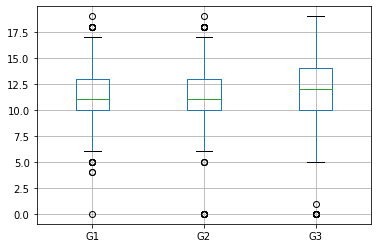

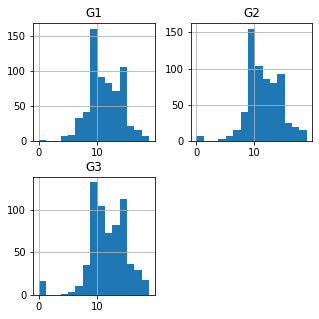

In [93]:
# your code here
print('Portuguese:')
data[data['Subject'] == 1].boxplot(column=['G1','G2','G3'])
data[data['Subject'] == 1][['G1','G2','G3']].hist(bins=15, figsize=(5,5))

### Вывод по "Portugues":
Очевидно, что большая часть студентов по трем оценкам имеет приблизительно средний бал ~ 10, причем на графиках видно, что в этой категории находиться чуть ли не вдвое больше человек, чем в остальных. Также стоит отметить, что на конечной оценке возросло кол-во студентов, которые получили результат 'выше среднего' (~ 14-15), но и число, получивших неудовлетворительный результат так же выросло.

Math:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25d7ac50>,
      dtype=object)

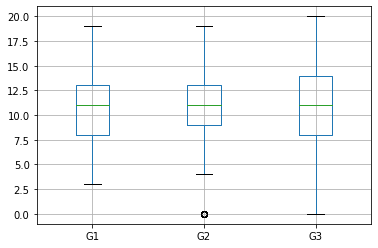

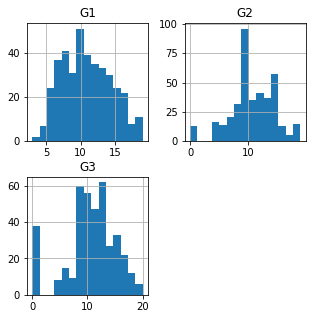

In [94]:
print('Math:')
data[data['Subject'] == 0].boxplot(column=['G1','G2','G3'])
data[data['Subject'] == 0][['G1','G2','G3']].hist(bins=15, figsize=(5,5))

### Вывод по "Math":
В отличии от оценок за португальский, распределения оценок за математику G1, G2 и G3 достаточно сильно разнятся. Так, распределение оценки G1 напоминает нормальное, вторая оценка несильно отличается от той же за португальский, а итоговая выделяется высокой долей студентов, получивших неуд.

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

                ID       age  absences    famrel      Dalc      Walc
ID        1.000000  0.008300 -0.040859  0.039233 -0.023987 -0.078744
age       0.008300  1.000000  0.153196  0.008945  0.132244  0.096908
absences -0.040859  0.153196  1.000000 -0.057935  0.132669  0.137115
famrel    0.039233  0.008945 -0.057935  1.000000 -0.072149 -0.094064
Dalc     -0.023987  0.132244  0.132669 -0.072149  1.000000  0.626111
Walc     -0.078744  0.096908  0.137115 -0.094064  0.626111  1.000000


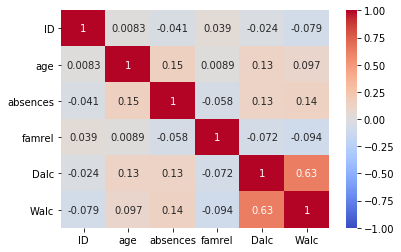

In [95]:
# your code here
import seaborn as sns
corr = data[disc_feat+real_feat].corr()
print(corr)
sns.heatmap(corr, xticklabels=disc_feat+real_feat, yticklabels=disc_feat+real_feat, vmin=-1, cmap='coolwarm', annot=True)

### Вывод:
Исходя из данных построенного корреляционного графика, можно сделать вывод, что наиболее зависимыми числовыми признаками являются "Walc" - "Dalc", а самыми малозависимыми будут пары "age" - "ID" и "famrel" - "ID", что очевидно, так как "ID" не несет особого смысла для анализа данных. Видимой обратной зависимости нельзя обозначить, но самый высокий показатель у "Walc" - "famrel".

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

[[ 1.00000000e+00  2.56088109e-01 -5.53881216e-02 -8.79162323e-02
   7.70548429e-03 -2.94966801e-02 -1.00853254e-01 -9.22137619e-02
  -8.11491405e-02 -2.88563678e-02 -5.79255561e-02 -2.52833468e-02
   7.98808718e-02 -6.09338955e-02 -8.30425166e-02 -3.71406707e-02
   5.90394118e-04 -4.73452858e-01 -2.27940898e-02  9.49822952e-03
  -9.67071382e-02 -7.83772516e-02  3.29927472e-02 -2.59492867e-02
   3.20107844e-02 -6.20543317e-03  7.97267860e-02  1.26459288e-01
   1.87166003e-01]
 [ 2.56088109e-01  1.00000000e+00 -7.25922462e-02 -3.41657059e-01
   3.48821271e-02  2.40304100e-02 -2.35643433e-01 -1.84092729e-01
  -1.75495877e-01 -4.22679478e-02 -1.13445468e-01 -3.99164218e-02
   2.58833668e-01 -1.33254600e-01  6.68558595e-02 -1.30498109e-01
  -8.84598833e-02 -1.30124910e-01 -9.79323430e-02 -1.93491323e-02
  -1.31382287e-01 -2.22993291e-01  7.57399071e-02  2.60076634e-02
   3.70003004e-02 -5.32135216e-02 -1.69123367e-01 -1.44858088e-01
  -1.27113929e-01]
 [-5.53881216e-02 -7.25922462e-02  1.0

Min corr -0.4734528578005685 paid Subject
Max corr 0.8587387525170551 G2 G1
Corr close to zero -0.00015474952849638436 G1 Pstatus


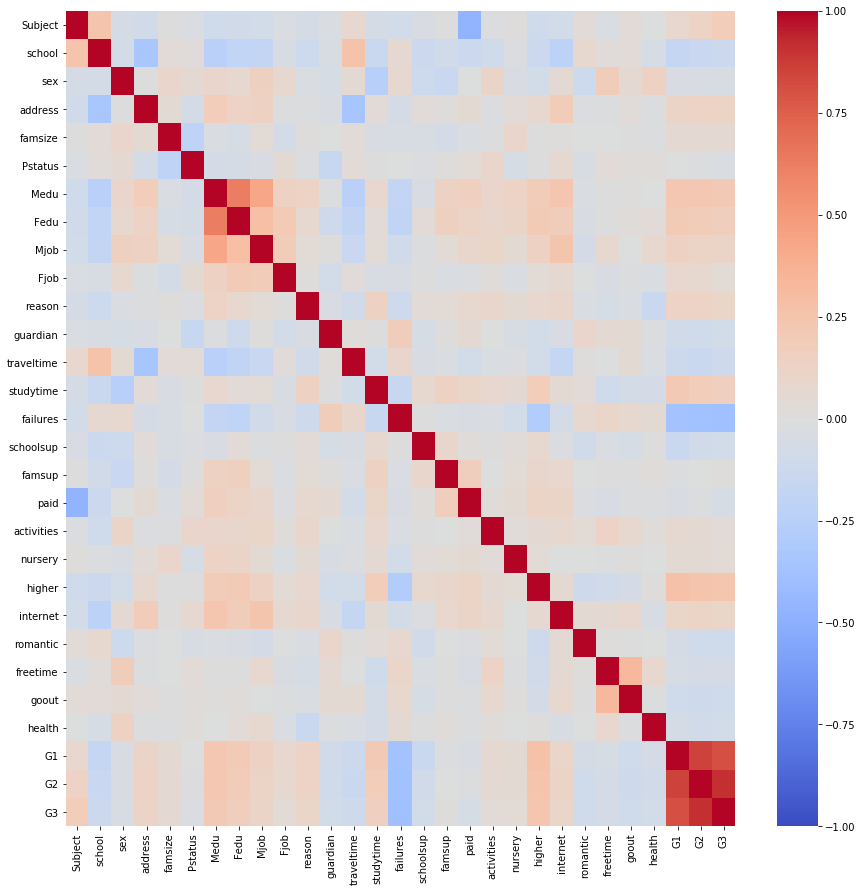

In [96]:
# your code here
import matplotlib.pyplot as plt

corr = np.corrcoef(np.array(data[cat_feat]).transpose())
print(corr)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=cat_feat, yticklabels=cat_feat, vmin=-1, cmap='coolwarm')

max_corr, min_corr, cls_zero_corr = 0, 0, 1
max_ind, min_ind, cls_zero_ind = tuple(), tuple(), tuple

for i1 in range(len(corr[0])):
    for i2 in range(len(corr[0])):
        if corr[i1][i2] < 0.9 and corr[i1][i2] > -0.9:
            if corr[i1][i2] <= min_corr:
                #print(i1, i2)
                min_corr = corr[i1][i2]
                min_ind = (i1, i2)
            elif corr[i1][i2] >= max_corr:
                max_corr = corr[i1][i2]
                max_ind = (i1, i2)
            elif abs(corr[i1][i2]) <= abs(cls_zero_corr):
                cls_zero_corr = corr[i1][i2]
                cls_zero_ind = (i1, i2)
            else:
                continue
                
print('Min corr', min_corr, cat_feat[min_ind[0]], cat_feat[min_ind[1]])
print('Max corr', max_corr, cat_feat[max_ind[0]], cat_feat[max_ind[1]])
print('Corr close to zero', cls_zero_corr, cat_feat[cls_zero_ind[0]], cat_feat[cls_zero_ind[1]])


### Вывод:
Исходя из данных построенного корреляционного графика, можно сделать вывод, что наиболее зависимыми категориальными признаками являются "G2" - "G1", а наивысший показатель обратной зависимости у пары "paid" - "Subject". Самая малозависимая же пара "G1" - "Pstatus".

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

Boys "Walc": 1224.29
Boys "Dalc": 796.49
Girls "Walc": 1167.62
Girls "Dalc": 766.48
(0, 'address')
(1, 'Pstatus')
(2, 'higher')
(3, 'romantic')
(4, 'freetime')
(0, 'address')
(1, 'Pstatus')
(2, 'higher')
(3, 'romantic')
(4, 'freetime')
(0, 'Medu')
(1, 'Fedu')
(0, 'Medu')
(1, 'Fedu')
"Walc" for best students in average: 1.85
"Dalc" for best students in average: 1.26
"Walc" for worst students in average: 2.16
"Dalc" for worst students in average: 1.51


"Walc" for students stud. portuguese in average: 2.28
"Dalc" for students stud. portuguese in average: 1.51
"Walc" for students stud. math in average: 2.3
"Dalc" for students stud. math in average: 1.48


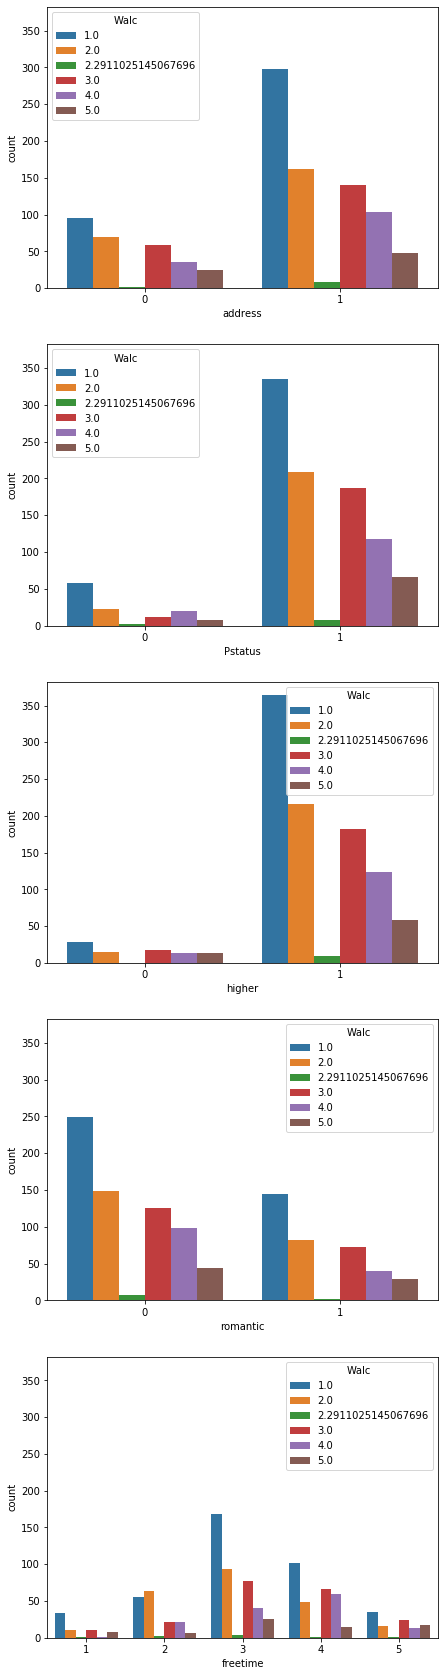

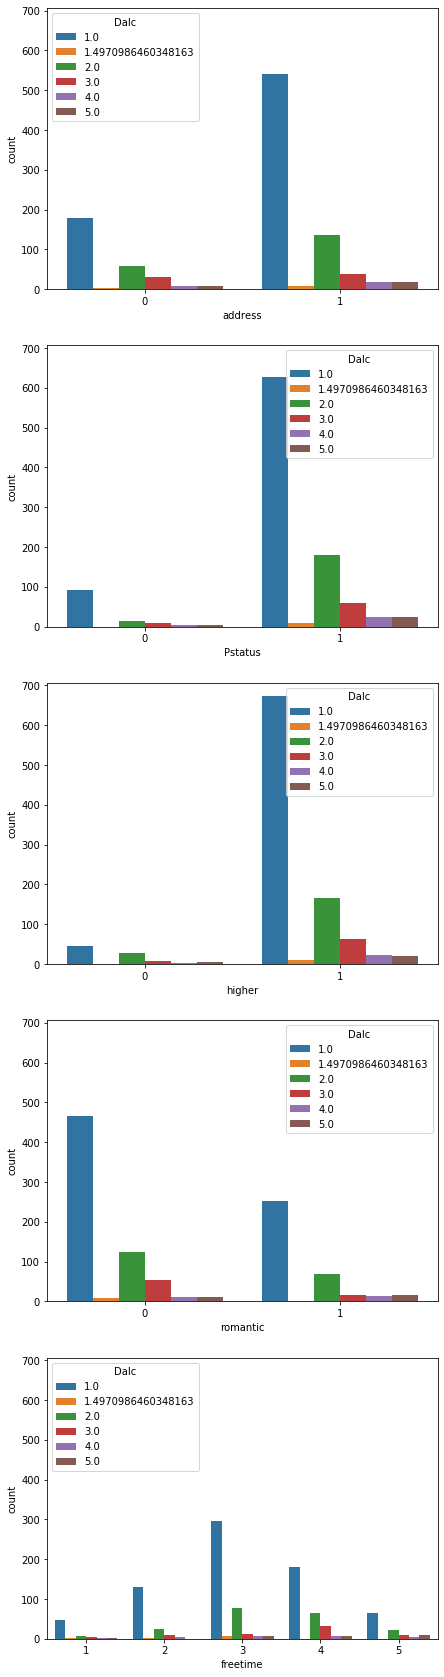

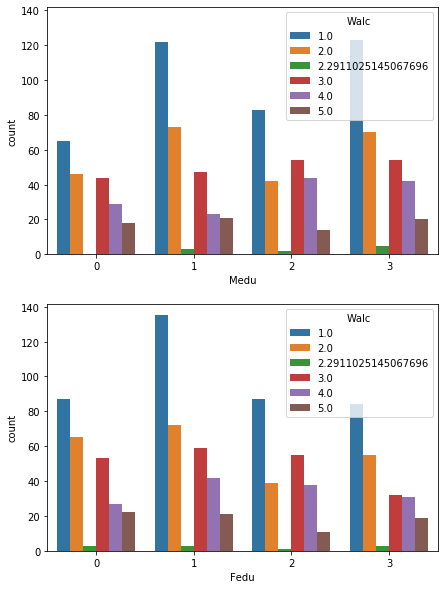

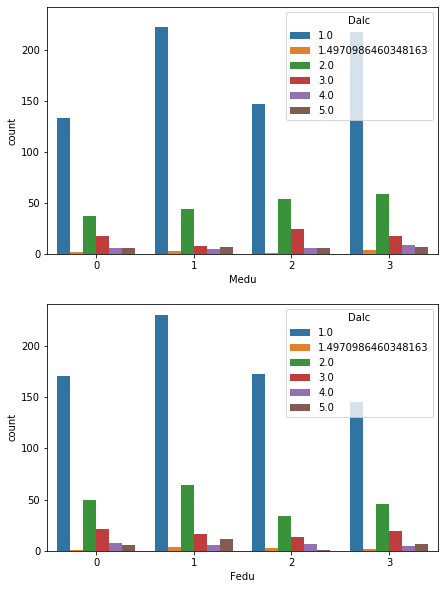

In [97]:
# your code here
# 1
def t1():
    print('Boys "Walc":', round(data[data['sex'] == 1]['Walc'].sum(), 2))
    print('Boys "Dalc":', round(data[data['sex'] == 1]['Dalc'].sum(), 2))
    print('Girls "Walc":', round(data[data['sex'] == 0]['Walc'].sum(), 2))
    print('Girls "Dalc":', round(data[data['sex'] == 0]['Dalc'].sum(), 2))
    
    
t1()

# 2
def t2(h):
    fig, axes = plt.subplots(5, figsize=(7, 30), sharey=True)
    for obj in enumerate(['address','Pstatus','higher','romantic','freetime']):
        print(obj)
        sns.countplot(x=obj[1], data=data, ax=axes[obj[0]], hue=h)

t2('Walc')
t2('Dalc')

# 3
def t3(h):
    fig, axes = plt.subplots(2, figsize=(7, 10), sharey=True)
    for obj in enumerate(['Medu', 'Fedu']):
        print(obj)
        sns.countplot(x=obj[1], data=data, ax=axes[obj[0]], hue=h)

t3('Walc')
t3('Dalc')

# 4
def t4():
    best_st = data.sort_values(by='G3', ascending=False)[['Walc','Dalc']][0:51]
    worst_st = data.sort_values(by='G3')[['Walc','Dalc']][0:51]
    print('"Walc" for best students in average: {}'.format(round(np.array(best_st['Walc']).mean(), 2)))
    print('"Dalc" for best students in average: {}'.format(round(np.array(best_st['Dalc']).mean(), 2)))
    print('"Walc" for worst students in average: {}'.format(round(np.array(worst_st['Walc']).mean(), 2)))
    print('"Dalc" for worst students in average: {}'.format(round(np.array(worst_st['Dalc']).mean(), 2)))

    print('\n')

    por_st = data[data['Subject'] == 1][['Walc','Dalc']]
    math_st = data[data['Subject'] == 0][['Walc','Dalc']]
    print('"Walc" for students stud. portuguese in average: {}'.format(round(np.array(por_st['Walc']).mean(), 2)))
    print('"Dalc" for students stud. portuguese in average: {}'.format(round(np.array(por_st['Dalc']).mean(), 2)))
    print('"Walc" for students stud. math in average: {}'.format(round(np.array(math_st['Walc']).mean(), 2)))
    print('"Dalc" for students stud. math in average: {}'.format(round(np.array(math_st['Dalc']).mean(), 2)))
t4()

### Вывод:
Очевидно, что отличники бухают меньше, это касается как выходных, так и будних дней (в среднем на ~ 0.3). Что же касается зависимости кол-ва выпитого алкоголя от предметной области, то тут не все так очевидно, показатели разнятся не очень сильно (~ 0.02 / ~ 0.03), однако по будням больше пьют студенты, изучающие португальский, а по выходным - математики.

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

(0, 'sex')
(1, 'traveltime')
(2, 'schoolsup')
(3, 'famsup')
(4, 'paid')
(5, 'internet')
(6, 'romantic')
(7, 'Walc')
(8, 'Dalc')


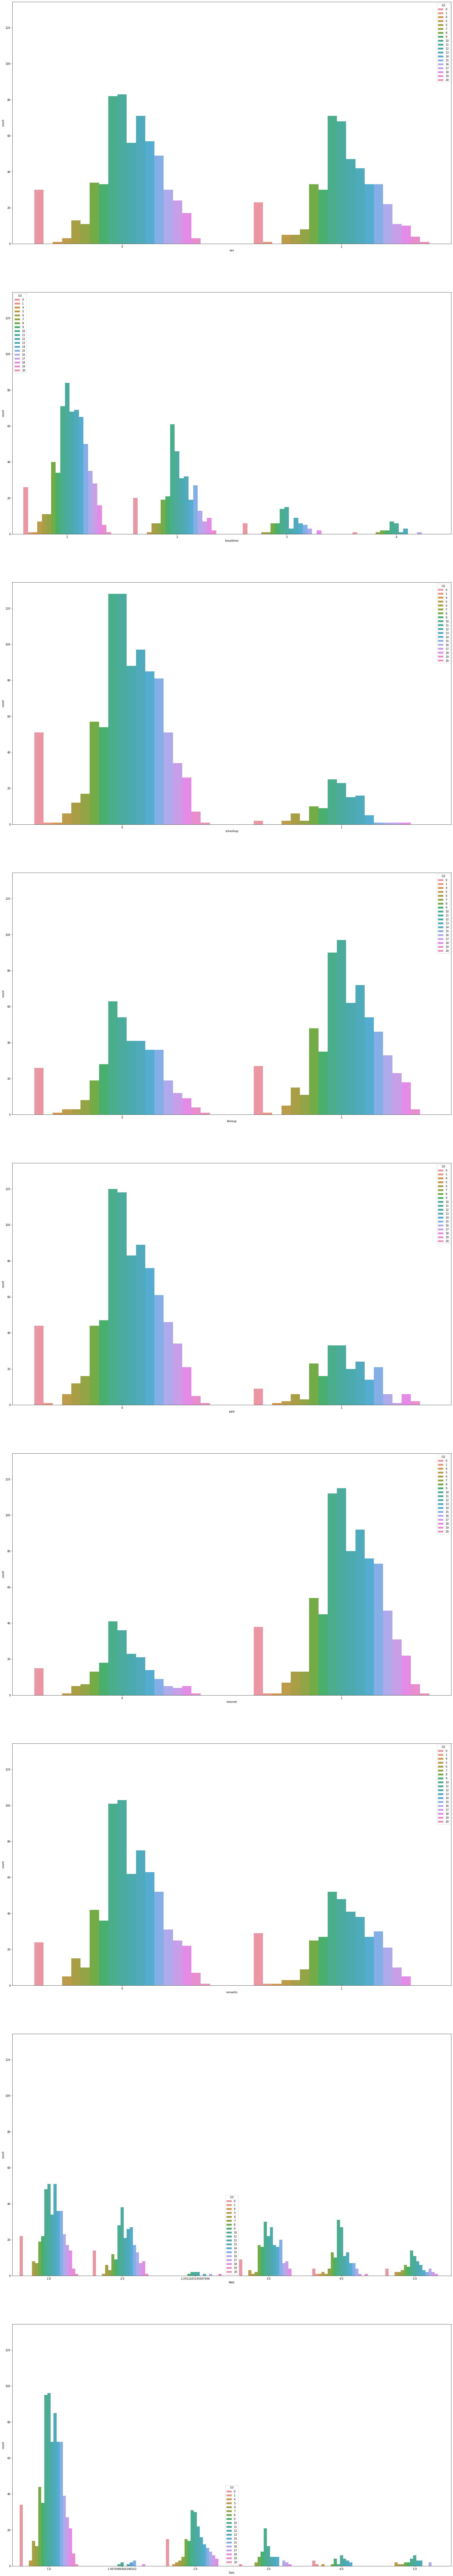

In [98]:
# your code here
def t():
    fig, axes = plt.subplots(9, figsize=(30, 180), sharey=True)
    for obj in enumerate(['sex', 'traveltime', 'schoolsup', 'famsup', 'paid', 'internet', 'romantic', 'Walc', 'Dalc']):
        print(obj)
        sns.countplot(x=obj[1], data=data, ax=axes[obj[0]], hue='G3')

t()


### Пометка:
На каждом из графиков можно видеть приорететную оценку в зависимости от попадания в ту или иную категорию. Например, если пронаблюдать зависимость итоговой оценки от пройденных платных курсов, то можно сделать вывод, что студенты не проходившие курс (знач. = 0) по итогу получали в сильном большинстве оценки ~ 10, а распределение прошедших выглядит более равномерно после G3 = 10, то есть соотношение получивших болле высокий бал у них выше.

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

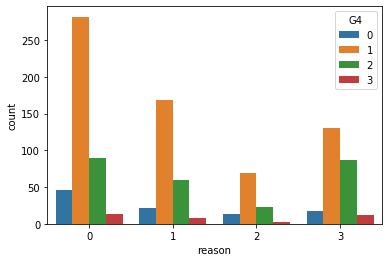

In [99]:
# your code here
def ch(x):
    if 18 <= x <= 20:
        return 3 # Отлично 
    elif 14 <= x <= 17:
        return 2 # Хорошо
    elif 8 <= x <= 13:
        return 1 # Удовлетворительно 
    elif x < 8:
        return 0 # Неудовлетворительно
    
data['G4'] = data['G3'].map(lambda x: ch(x))

# reasons: 0 - course, 1 - home, 2 - other, 3 - reputation

fig = plt.plot(figsize=(30, 180), sharey=True)
sns.countplot(x='reason', data=data, hue='G4')

## Комментарий:
В общем и целом, распределение оценок по 4-х бальной системе у тех, кто выбрал школу исходя из читаемого курса, удаленности от дома либо по другой неизвестной причине практически идентично (сильный перевес тех, кто получил удовлетворительно, а далее - отлично < неудовлетворительно < хорошо), отличается лишь кол-во студентов, выбравших шк. по той или иной причине (other < home < course). А вот у тех, кто выбирал школу, исходя из ее репутации выше коэффициент хорошистов по сравнению со студентами, выбор которых основывался на других причинах.

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [100]:
# your code here
import itertools as it

count = 0
count_por_higher = 0
count_math_higher = 0
count_equal_marks = 0
for st1, st2 in it.combinations(zip(data['Subject'],data['age'],data['sex'],data['address'],data['Pstatus'],data['Medu'],data['Fedu'],data['guardian'],data['activities'],data['nursery'],data['health'],data['absences'],data['famrel'],data['Dalc'],data['Walc'],data['goout'],data['G3']), 2):
    if all([st1[0] != st2[0], st1[1] == st2[1], st1[2] == st2[2], st1[3] == st2[3], st1[4] == st2[4], st1[5] == st2[5], st1[6] == st2[6], st1[7] == st2[7], st1[8] == st2[8], st1[9] == st2[9], st1[10] == st2[10], st1[11] == st2[11], st1[12] == st2[12], st1[13] == st2[13], st1[14] == st2[14], st1[15] == st2[15]]):
        count += 1
        if st1[0] == 1:
            if st1[-1] > st2[-1]:
                count_por_higher += 1
                continue
            elif st1[-1] < st2[-1]:
                count_math_higher += 1
                continue
        else:
            if st1[-1] < st2[-1]:
                count_por_higher += 1
                continue
            elif st1[-1] > st2[-1]:
                count_math_higher += 1
                continue
        count_equal_marks += 1
        
print('Студентов с двумя предметами: ', count)
print('Из них тех, у кого выше бал по португальскому выше: ', count_por_higher)
print('Из них тех, у кого выше бал по матеше выше: ', count_math_higher)
print('Из них тех, у кого бал одинаков для двух предметов: ', count_equal_marks)


Студентов с двумя предметами:  90
Из них тех, у кого выше бал по португальскому выше:  49
Из них тех, у кого выше бал по матеше выше:  27
Из них тех, у кого бал одинаков для двух предметов:  14


### Замечание:
Как уже было указано выше, всего студентов, которые выбрали оба предмета получилось 90, из нех тех, у кого бал выше за португальский - 49, а за математику - 27. Но также есть и те, у кого оценки за оба предмета совпадают, их 14 человек.

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [2]:
# your code here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

target = data['G4']
gen_data = data.drop(['G4'], axis=1)

rf = RandomForestClassifier(n_estimators=100)
x_train, x_test, y_train, y_test = train_test_split(gen_data, target, test_size=0.2, random_state=4)
md_trained1 = rf.fit(x_train, y_train)
res = md_trained1.predict(x_test)

# mean square error

round(np.mean((res-y_test)**2), 2)

NameError: name 'data' is not defined

In [102]:
print(y_test.values, res)

[1 0 2 1 2 1 1 2 2 1 0 1 2 1 1 0 1 2 1 2 2 1 1 1 3 1 2 1 2 1 1 1 1 1 1 1 2
 1 1 1 3 2 2 1 1 1 1 1 2 1 0 3 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 2 1 2
 1 1 2 1 2 2 0 2 1 1 2 2 3 1 1 1 2 1 2 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 2 1 1 1 3
 2 1 0 2 2 1 1 2 1 0 0 1 0 1 1 1 2 1 0 1 0 1 0 2 2 1 0 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 1 1 1] [1 0 2 1 2 1 1 2 2 1 0 1 2 1 1 0 1 2 1 2 2 1 1 1 3 1 2 1 2 1 1 1 1 1 1 1 2
 1 1 1 3 2 2 1 1 1 1 1 2 1 0 3 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 2 1 2
 1 1 2 1 2 2 0 2 1 1 2 2 2 1 1 1 2 1 2 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 2 1 1 1 3
 2 1 0 2 2 1 1 2 1 0 0 1 0 1 1 1 2 1 0 1 0 1 0 2 2 1 0 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 1 1 1]


### Вывод:
Создали и натренировали модель RandomForest, которая очень хорошо справляется, а точнее, используя тестовые данные, точно предсказвыает результат.

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [103]:
# your code here
# Попробуем использовать другие модели для прогнозов и исследуем их точность.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(gen_data, target, test_size=0.2, random_state=4)
md_trained2 = lr.fit(x_train, y_train)
res = md_trained2.predict(x_test)

# mean square error

round(np.mean((res-y_test)**2), 2)

0.43

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 18)
x_train, x_test, y_train, y_test = train_test_split(gen_data, target, test_size=0.2, random_state=4)
md_trained3 = knc.fit(x_train, y_train)
res = md_trained3.predict(x_test)

# mean square error

round(np.mean((res-y_test)**2), 2)

0.45

### Вывод:
Наилучший результат показала модель RandomForest, выдавая практически безошибочные предсказания, далее идет логистическая регрессия, которая ошибается в среднем на ~ 0.43, и несильно от нее отстает метод ближайших соседей (ошибка в среднем ~ 0.45).

#### Выполнил: Евтеев И. C. 18БИ-1 (ИАД - группа 4)